<a href="https://colab.research.google.com/github/nguyenminhkhuong/machine_learning/blob/main/LinearRealDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [3]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first row of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [4]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [5]:
# Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [6]:
# Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 0s 738us/step - loss: 307897.9688 - root_mean_squared_error: 554.8856
Epoch 2/30
567/567 [==============================] - 0s 766us/step - loss: 27584.8145 - root_mean_squared_error: 166.0868
Epoch 3/30
567/567 [==============================] - 0s 755us/step - loss: 26804.9629 - root_mean_squared_error: 163.7222
Epoch 4/30
567/567 [==============================] - 0s 747us/step - loss: 26178.3125 - root_mean_squared_error: 161.7971
Epoch 5/30
567/567 [==============================] - 0s 787us/step - loss: 25516.5176 - root_mean_squared_error: 159.7389
Epoch 6/30
567/567 [==============================] - 0s 734us/step - loss: 24834.4512 - root_mean_squared_error: 157.5895
Epoch 7/30
567/567 [==============================] - 0s 746us/step - loss: 24189.7402 - root_mean_squared_error: 155.5305
Epoch 8/30
567/567 [==============================] - 0s 731us/step - loss: 23622.7891 - root_mean_squared_error: 153.6971
Epoch 9/30
567/

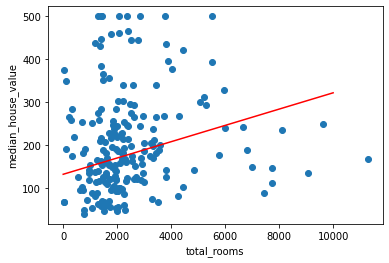

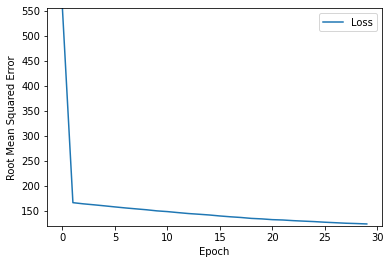

In [7]:
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the model
my_feature = "total_rooms"
my_label = "median_house_value"

my_model = None

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, 
                                         my_label, epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [8]:
def predict_house_values(n, feature, label):

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))
    
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             170
 3400     92             197
 3677     69             202
 2202     62             174
 2403     80             178
 5652    295             240
 3318    500             195
 2552    342             181
 1364    118             158
 3468    128             198


Epoch 1/18
5667/5667 [==============================] - 5s 804us/step - loss: 29076.1172 - root_mean_squared_error: 170.5172
Epoch 2/18
5667/5667 [==============================] - 4s 749us/step - loss: 20372.6738 - root_mean_squared_error: 142.7329
Epoch 3/18
5667/5667 [==============================] - 4s 754us/step - loss: 18254.8711 - root_mean_squared_error: 135.1106
Epoch 4/18
5667/5667 [==============================] - 5s 832us/step - loss: 18136.2266 - root_mean_squared_error: 134.6708
Epoch 5/18
5667/5667 [==============================] - 4s 761us/step - loss: 18001.1758 - root_mean_squared_error: 134.1685
Epoch 6/18
5667/5667 [==============================] - 4s 752us/step - loss: 18207.8965 - root_mean_squared_error: 134.9366
Epoch 7/18
5667/5667 [==============================] - 5s 799us/step - loss: 17917.3516 - root_mean_squared_error: 133.8557
Epoch 8/18
5667/5667 [==============================] - 4s 754us/step - loss: 18017.3711 - root_mean_squared_error: 134.2288


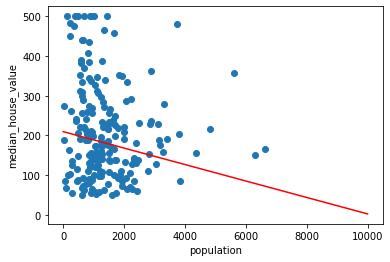

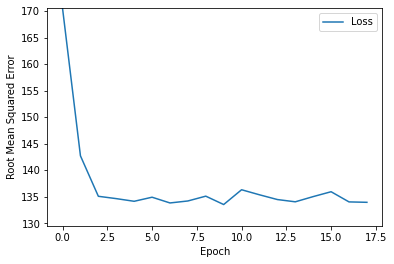

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             183
 1867     92             171
 2191     69             164
 1052     62             188
 1647     80             176
 2312    295             162
 1604    500             176
 1066    342             188
  338    118             203
 1604    128             176


In [9]:
my_feature = "population" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

Epoch 1/24
567/567 [==============================] - 1s 913us/step - loss: 27153.4863 - root_mean_squared_error: 164.7831
Epoch 2/24
567/567 [==============================] - 0s 862us/step - loss: 7263.4023 - root_mean_squared_error: 85.2256
Epoch 3/24
567/567 [==============================] - 1s 913us/step - loss: 7016.2808 - root_mean_squared_error: 83.7632
Epoch 4/24
567/567 [==============================] - 0s 876us/step - loss: 7015.1167 - root_mean_squared_error: 83.7563
Epoch 5/24
567/567 [==============================] - 1s 911us/step - loss: 7017.0142 - root_mean_squared_error: 83.7676
Epoch 6/24
567/567 [==============================] - 0s 758us/step - loss: 7014.1211 - root_mean_squared_error: 83.7504
Epoch 7/24
567/567 [==============================] - 0s 772us/step - loss: 7017.2739 - root_mean_squared_error: 83.7692
Epoch 8/24
567/567 [==============================] - 0s 776us/step - loss: 7015.3164 - root_mean_squared_error: 83.7575
Epoch 9/24
567/567 [==========

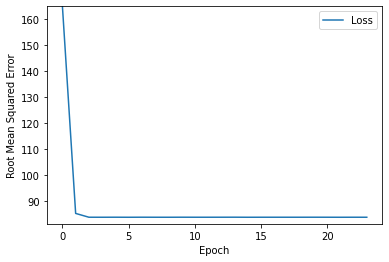

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             135
    4     92             214
    3     69             155
    2     62             133
    3     80             155
    2    295             149
   10    500             461
    5    342             262
    2    118             148
    4    128             223
    8    187             401
    3     80             164
    3    112             181
    4     95             223
    2     69             144


In [15]:
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "median_income"

learning_rate = 0.06
epochs = 24
batch_size = 30

my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)

In [12]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_person,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2,0.2
room_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0,1.0
